In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load suicide data from WHO & Country code data
    # http://apps.who.int/gho/data/node.main.MHSUICIDEASDR?lang=en
Sui_DF = pd.read_csv('Mental Health_Suicide Rate_Age Standard.csv')
Continent_DF = pd.read_csv('country-codes_csv.csv')

# Country to continent data source: https://datahub.io/core/country-codes#resource-country-codes_zip
Cont_DF = Continent_DF[['official_name_en', 'Region Name']] 
Cont_DF = Cont_DF.drop(Cont_DF.index[0]) # remove first row
Cont_DF.head()

,official_name_en,Region Name
1,Afghanistan,Asia
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
5,Andorra,Europe


In [2]:
# Part 1: List top 10 suicide rate countries (both sexes; Average 2000-2015); Where are they (what continents or regions)?
BothSex = Sui_DF.drop_duplicates(subset = ['official_name_en'], keep = 'first') # remove male & female data
BothSex = BothSex.drop(BothSex.index[0]) # remove first row
#df = df.assign(mean=df.mean(axis=1))
BothSex = BothSex.assign(MeanSuicideRate=BothSex.mean(axis=1)) # Add one more column about the average of 2000-2015 at the 
BothSex = BothSex[['official_name_en','MeanSuicideRate']] # Make data frame organized
BothSex = BothSex.sort_values(by='MeanSuicideRate', ascending=False) 
BothSex[:10] # Show top 10 data

,official_name_en,MeanSuicideRate
289,Lithuania,33.650
460,Sri Lanka,33.125
325,Mongolia,31.600
256,Kazakhstan,30.650
466,Suriname,28.725
211,Guyana,28.400
43,Belarus,27.700
157,Equatorial Guinea,27.125
403,Russian Federation,25.975
10,Angola,25.375


In [3]:
# Merge Data
Merge = pd.merge(BothSex, Cont_DF, on='official_name_en') # ref video: https://www.youtube.com/watch?v=h4hOPGo4UVU
    # we only take overlaped data from two files; if we'd like to take outer join, add how='outer'
Merge[:5]   

,official_name_en,MeanSuicideRate,Region Name
0,Lithuania,33.650,Europe
1,Sri Lanka,33.125,Asia
2,Mongolia,31.600,Asia
3,Kazakhstan,30.650,Asia
4,Suriname,28.725,Americas


In [4]:
## Count top50 distribution
Top50 = Merge[:50]
Top50 = Top50.drop(['MeanSuicideRate'], axis=1)
Count_A = Top50.groupby(['Region Name']).count()
Count_A=Count_A.reset_index() # After groupby, the "Region name" now become the index, so I cannot choose it.
                  # with "reset_index()", I can convert it back to title
                  # ref: https://stackoverflow.com/questions/21767900/how-to-move-pandas-data-from-index-to-column-after-multiple-groupby
Count_A

## Count total countries in different conitnents
Total = Merge.groupby(['Region Name']).count()
Total = Total.drop(['MeanSuicideRate'], axis=1)
Total = Total.reset_index()
Total

## Merge two data  
Final_DF = pd.merge(Count_A, Total, on='Region Name')
Final_DF

## Add one new column: ratio
Ratio = np.divide(Final_DF[['official_name_en_x']],Final_DF[['official_name_en_y']]) 
        # ref: https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.divide.html

Final_DF['Ratio'] = Ratio.values # Add new column
Final = Final_DF.rename(index=str, columns={"official_name_en_x": "Top 50", "official_name_en_y": "Total Country"})
Final

,Region Name,Top 50,Total Country,Ratio
0,Africa,19,52,0.365385
1,Americas,5,33,0.151515
2,Asia,10,47,0.212766
3,Europe,15,38,0.394737
4,Oceania,1,10,0.100000


([<matplotlib.patches.Wedge at 0x2094b47710>,
 [Text(0.404937,1.02275,'Africa'),
  Text(-0.99531,0.468357,'Americas'),
  Text(-0.963937,-0.529929,'Asia'),
  Text(0.529929,-0.963937,'Europe'),
  Text(1.09783,-0.0690695,'Oceania')],
 [Text(0.220875,0.557866,'38.0%'),
  Text(-0.542896,0.255468,'10.0%'),
  Text(-0.525784,-0.289052,'20.0%'),
  Text(0.289052,-0.525784,'30.0%'),
  Text(0.598816,-0.0376743,'2.0%')])

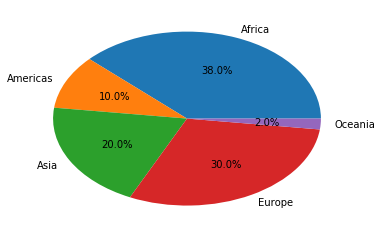

In [5]:
## Pie plot
#Plot 1: Top 50
plt.pie(
    Final['Top 50'],
    labels=Final['Region Name'],
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

([<matplotlib.patches.Wedge at 0x2094bba588>,
 [Text(0.650977,0.886696,'Africa'),
  Text(-0.702719,0.846278,'Americas'),
  Text(-1.09822,-0.0625186,'Asia'),
  Text(0.0492747,-1.0989,'Europe'),
  Text(1.06399,-0.279154,'Oceania')],
 [Text(0.355078,0.483652,'29.8%'),
  Text(-0.383301,0.461606,'12.4%'),
  Text(-0.59903,-0.0341011,'17.4%'),
  Text(0.0268771,-0.599398,'32.2%'),
  Text(0.580358,-0.152266,'8.2%')])

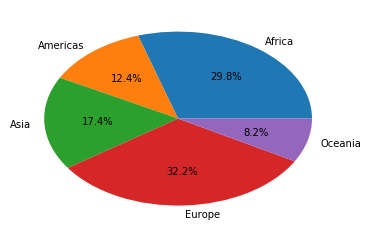

In [6]:
#Plot 2:
plt.pie(
    Final['Ratio'],
    labels=Final['Region Name'],
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )